# Displaying the dataset for the Arcachon Basin
Data were provided through SeaDataNet Pan-European infrastructure for ocean and marine data management
(https://www.seadatanet.org)

## Import libraries and load dataset

In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("dataset_mieux.xyz", sep=",", header=2)
print(data)

       long(DD)    lat(DD)  depth(m - down positive - LAT)
0     -1.129300  44.711900                             6.8
1     -1.199650  44.720833                            -2.4
2     -1.113117  44.650867                            -2.6
3     -1.213150  44.608133                            17.2
4     -1.170017  44.669033                            14.8
...         ...        ...                             ...
13251 -1.316400  44.608267                            19.9
13252 -1.318823  44.609089                            19.9
13253 -1.316857  44.610122                            19.9
13254 -1.315600  44.607617                            20.0
13255 -1.316190  44.607389                            20.0

[13256 rows x 3 columns]


## Process data
Transform csv data to numpy arrays to be plotted

Correct for real depth (opposite of dataset depth), and translate to the average tide of $1.980m$ for Arcachon Basin

In [3]:
data = data.rename(columns={"long(DD)": "long", "lat(DD)": "lat", "depth(m - down positive - LAT)": "depth"})
data["depth"] = data["depth"].map(lambda dep: -1*dep - 1.980)
data.drop(data[data.depth > 0].index, inplace=True)

depth = data["depth"]
long = data["long"].to_numpy()
lat = data["lat"].to_numpy()

## Plot data

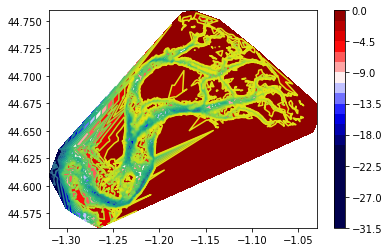

In [5]:
plt.figure()
plt.scatter(long, lat, c=depth, cmap="seismic")
#plt.tricontour(long, lat, depth, levels=20)
#contour = plt.tricontourf(long, lat, depth, levels=20, cmap='seismic')
#plt.colorbar(contour)
plt.clim(vmin=-20)
plt.show()